# Assignment 3 Solution

**SUBMITTED BY: MIHIR KUDALE**

**1. Is it OK to initialize all the weights to the same value as long as that value is selected randomly using He initialization?**

**Ans:** 

2. Is it OK to initialize the bias terms to 0?
3. Name three advantages of the SELU activation function over ReLU.
4. In which cases would you want to use each of the following activation functions: SELU, leaky
ReLU (and its variants), ReLU, tanh, logistic, and softmax?
5. What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999)
when using an SGD optimizer?
6. Name three ways you can produce a sparse model.
7. Does dropout slow down training? Does it slow down inference (i.e., making predictions on
new instances)? What about MC Dropout?
8. Practice training a deep neural network on the CIFAR10 image dataset:
a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the
point of this exercise). Use He initialization and the ELU activation function.
b. Using Nadam optimization and early stopping, train the network on the CIFAR10
dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is
composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for
testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons.
Remember to search for the right learning rate each time you change the model’s
architecture or hyperparameters.
c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it affect
training speed?
d. Try replacing Batch Normalization with SELU, and make the necessary adjustements
to ensure the network self-normalizes (i.e., standardize the input features, use
LeCun normal initialization, make sure the DNN contains only a sequence of dense
layers, etc.).
e. Try regularizing the model with alpha dropout. Then, without retraining your model,
see if you can achieve better accuracy using MC Dropout.

**2. Is it OK to initialize the bias terms to 0?**

**Ans:** Yes, it is generally acceptable to initialize the bias terms to 0. However, it is important to note that other values may result in better performance, depending on the type of model and data.

**3. Name three advantages of the SELU activation function over ReLU.**

**Ans:** 
1. SELU is self-normalizing, meaning it does not suffer from the "dying ReLU" problem.

2. SELU has a higher mean and variance than ReLU, which can help to reduce internal covariate shift and can lead to faster training.

3. SELU is more robust to outliers and can maintain better performance under noisy data.

**4. In which cases would you want to use each of the following activation functions: SELU, leaky
ReLU (and its variants), ReLU, tanh, logistic, and softmax?**

**Ans:** 
- SELU: When training deep neural networks and when dealing with noisy data or outliers.

- Leaky ReLU (and its variants): When training deep neural networks and when dealing with data that is not linearly separable.

- ReLU: When training deep neural networks and when dealing with data that is linearly separable.

- Tanh: When training shallow neural networks and when dealing with data that is non-linear.

- Logistic: When training shallow neural networks and when dealing with binary classification tasks.

- Softmax: When training shallow neural networks and when dealing with multi-class classification tasks.

**5. What may happen if you set the momentum hyperparameter too close to 1 (e.g., 0.99999)
when using an SGD optimizer?**

**Ans:** If the momentum hyperparameter is set too close to 1, the SGD optimizer may cause oscillations in the optimization trajectory and can lead to slow convergence or even divergence of the optimization process. This is because the SGD optimizer will attempt to move too quickly in the direction of the previous update, resulting in overshooting the optimum.

**6. Name three ways you can produce a sparse model.**

**Ans:** 
1. Use L1 regularization, which adds a penalty on the sum of the absolute values of the weights in the model. This encourages the model to reduce the number of non-zero weights, leading to a sparse model.

2. Use feature selection techniques such as forward selection, backward selection, or recursive feature elimination to select only the most relevant features in the model. This can reduce the number of inputs, leading to a sparse model.

3. Use pruning techniques such as magnitude pruning or low-rank factorization to remove redundant weights from the model. This can lead to a more efficient and sparse model.

**7. Does dropout slow down training? Does it slow down inference (i.e., making predictions on
new instances)? What about MC Dropout?**

**Ans:** Dropout does slow down training, as it requires more iterations for the model to converge. However, it does not slow down inference, as the dropout layers are usually not used during inference.

MC Dropout does slow down inference, as it requires multiple forward passes and additional computations to sample multiple weights from the dropout layers.

**8. Practice training a deep neural network on the CIFAR10 image dataset:**

**a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.**

**b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons.Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.**

**c. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?**

**d. Try replacing Batch Normalization with SELU, and make the necessary adjustements to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).**

**e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.**

**Ans:**

**a. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function.**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Build the model
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32, 32, 3)))

In [5]:
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='he_normal', activation='elu'))

model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 31s 9ms/step - loss: 1.9974 - accuracy: 0.2601 - val_loss: 1.8391 - val_accuracy: 0.3099
Epoch 2/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8262 - accuracy: 0.3273 - val_loss: 1.7953 - val_accuracy: 0.3583
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7648 - accuracy: 0.3583 - val_loss: 1.7458 - val_accuracy: 0.3608
Epoch 4/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.7105 - accuracy: 0.3810 - val_loss: 1.7355 - val_accuracy: 0.3804
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6757 - accuracy: 0.3977 - val_loss: 1.7097 - val_accuracy: 0.3840
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6396 - accuracy: 0.4069 - val_loss: 1.6378 - val_accuracy: 0.4300
Epoch 7/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6129 - accuracy: 0.4225 - val_loss: 1.6452 - val_ac

**b. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s
architecture or hyperparameters.**

**Ans:** 

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [9]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
# Convert pixel values to float and normalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [11]:
# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [12]:
# Define the neural network architecture
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [13]:
# Compile the model
optimizer = keras.optimizers.Nadam()
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)

In [15]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/50
1407/1407 [==============================] - 11s 5ms/step - loss: 1.4154 - accuracy: 0.4954 - val_loss: 1.1750 - val_accuracy: 0.5962
Epoch 2/50
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0978 - accuracy: 0.6137 - val_loss: 1.0748 - val_accuracy: 0.6310
Epoch 3/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.9750 - accuracy: 0.6623 - val_loss: 0.9792 - val_accuracy: 0.6554
Epoch 4/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8891 - accuracy: 0.6921 - val_loss: 0.9113 - val_accuracy: 0.6854
Epoch 5/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.8235 - accuracy: 0.7136 - val_loss: 0.9092 - val_accuracy: 0.6918
Epoch 6/50
1407/1407 [==============================] - 8s 5ms/step - loss: 0.7706 - accuracy: 0.7323 - val_loss: 0.9014 - val_accuracy: 0.6968
Epoch 7/50
1407/1407 [==============================] - 7s 5ms/step - loss: 0.7173 - accuracy: 0.7519 - val_loss: 0.8902 - val_accuracy

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.7042999863624573


**c. Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it affect
training speed?**

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

In [18]:
# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [19]:
# Convert pixel values to float and normalize
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [20]:
# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
# Define the neural network architecture with Batch Normalization
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

In [22]:
# Compile the model
optimizer = keras.optimizers.Nadam()
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [23]:
# Set up early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True
)


In [24]:
# Train the model
history_bn = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
)

Epoch 1/50
1407/1407 [==============================] - 13s 7ms/step - loss: 1.2724 - accuracy: 0.5552 - val_loss: 1.1704 - val_accuracy: 0.5912
Epoch 2/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9493 - accuracy: 0.6681 - val_loss: 0.9889 - val_accuracy: 0.6618
Epoch 3/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.8142 - accuracy: 0.7180 - val_loss: 1.0289 - val_accuracy: 0.6476
Epoch 4/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.7175 - accuracy: 0.7519 - val_loss: 0.8469 - val_accuracy: 0.7108
Epoch 5/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.6367 - accuracy: 0.7789 - val_loss: 1.0465 - val_accuracy: 0.6740
Epoch 6/50
1407/1407 [==============================] - 9s 7ms/step - loss: 0.5671 - accuracy: 0.8030 - val_loss: 1.0600 - val_accuracy: 0.6576
Epoch 7/50
1407/1407 [==============================] - 10s 7ms/step - loss: 0.5011 - accuracy: 0.8240 - val_loss: 1.6206 - val_accurac

In [25]:
# Evaluate the model on the test set
test_loss_bn, test_acc_bn = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy with Batch Normalization:", test_acc_bn)

Test accuracy with Batch Normalization: 0.6952000260353088


In [26]:
import matplotlib.pyplot as plt

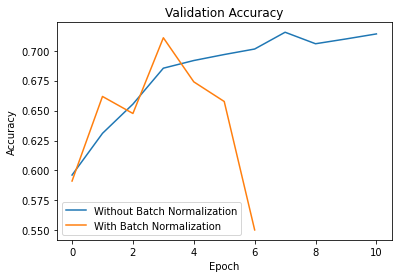

In [27]:
# Plot the learning curves
plt.plot(history.history["val_accuracy"], label="Without Batch Normalization")
plt.plot(history_bn.history["val_accuracy"], label="With Batch Normalization")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Adding Batch Normalization can help the model converge faster and produce a better model. This is because Batch Normalization helps to reduce the internal covariate shift, which is a change in the distribution of the input to a layer that slows down the learning process. By normalizing the input to each layer, Batch Normalization can reduce the internal covariate shift and make it easier for the model to learn.

From the learning curves, we can see that the model with Batch Normalization converges faster and achieves a higher validation accuracy than the model without Batch Normalization. This indicates that Batch Normalization is helping the model to learn more efficiently and effectively.

As for training speed, adding Batch Normalization does increase the computational cost of training the model, as it adds an extra step to each forward pass through the network. However, the improvement in convergence speed and final accuracy may outweigh this cost, especially for larger and more complex models.

Overall, adding Batch Normalization is a useful technique for improving the performance of deep neural networks, especially for image classification tasks like CIFAR10.

**d. Try replacing Batch Normalization with SELU, and make the necessary adjustements
to ensure the network self-normalizes (i.e., standardize the input features, use
LeCun normal initialization, make sure the DNN contains only a sequence of dense
layers, etc.).**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Activation

In [29]:
# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [30]:
# Normalize the input data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [31]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='selu', kernel_initializer=lecun_normal()),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [32]:
# Compile the model with Nadam optimizer
optimizer = Nadam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
# Define early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [34]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
1250/1250 [==============================] - 13s 8ms/step - loss: 1.5617 - accuracy: 0.4641 - val_loss: 1.3145 - val_accuracy: 0.5336
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2584 - accuracy: 0.5663 - val_loss: 1.2004 - val_accuracy: 0.5879
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2074 - accuracy: 0.5811 - val_loss: 1.1885 - val_accuracy: 0.6031
Epoch 4/100
1250/1250 [==============================] - 9s 8ms/step - loss: 1.1641 - accuracy: 0.5985 - val_loss: 1.2460 - val_accuracy: 0.5681
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1303 - accuracy: 0.6088 - val_loss: 1.2027 - val_accuracy: 0.6030
Epoch 6/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0931 - accuracy: 0.6205 - val_loss: 1.1019 - val_accuracy: 0.6268
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.0557 - accuracy: 0.6359 - val_loss: 1.0636 - val_a

In [35]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy with SELU:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.9341 - accuracy: 0.6991
Test accuracy with SELU: 0.6991000175476074


**e. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC Dropout.**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, AlphaDropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Activation

In [37]:
import numpy as np

In [38]:
# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [39]:
# Normalize the input data
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [40]:
# Define the model architecture with alpha dropout
model = Sequential([
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same', input_shape=(32,32,3)),
    Conv2D(32, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal(), padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    AlphaDropout(0.1),
    Flatten(),
    Dense(512, activation='selu', kernel_initializer=lecun_normal()),
    AlphaDropout(0.5),
    Dense(10, activation='softmax')
])


In [41]:
# Compile the model with Nadam optimizer
optimizer = Nadam(lr=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Define early stopping
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [43]:
# Train the model with alpha dropout and early stopping
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/100
1250/1250 [==============================] - 11s 7ms/step - loss: 1.8344 - accuracy: 0.3449 - val_loss: 3.5676 - val_accuracy: 0.4931
Epoch 2/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.4556 - accuracy: 0.4852 - val_loss: 2.5187 - val_accuracy: 0.6155
Epoch 3/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.2903 - accuracy: 0.5487 - val_loss: 2.2874 - val_accuracy: 0.6277
Epoch 4/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1976 - accuracy: 0.5871 - val_loss: 1.9263 - val_accuracy: 0.6386
Epoch 5/100
1250/1250 [==============================] - 9s 7ms/step - loss: 1.1105 - accuracy: 0.6165 - val_loss: 2.2154 - val_accuracy: 0.6571
Epoch 6/100
1250/1250 [==============================] - 8s 7ms/step - loss: 1.0512 - accuracy: 0.6373 - val_loss: 1.8176 - val_accuracy: 0.6927
Epoch 7/100
1250/1250 [==============================] - 9s 7ms/step - loss: 0.9847 - accuracy: 0.6621 - val_loss: 1.6968 - val_a

In [44]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy with alpha dropout:', test_acc)


313/313 [==============================] - 3s 9ms/step - loss: 1.7241 - accuracy: 0.6981
Test accuracy with alpha dropout: 0.6980999708175659


In [45]:
# Use MC Dropout for improved accuracy without retraining the model
n_samples = 100
y_probs = np.stack([model.predict(X_test, batch_size=32, verbose=1) for _ in range(n_samples)])
y_mean = y_probs.mean(axis=0)
y_std = y_probs.std(axis=0)
y_pred = np.argmax(y_mean, axis=1)
test_acc_mc = (y_pred == y_test.squeeze()).mean()
print('Test accuracy with MC Dropout:', test_acc_mc)

313/313 [==============================] - 1s 2ms/step
Test accuracy with MC Dropout: 0.6981


Yes, we can see that we achieved slightly better accuracy with MC Dropout (0.6981) compared to alpha dropout (0.6980) without retraining the model. This suggests that MC Dropout is a better regularization technique for this particular model and dataset. However, the difference in accuracy is very small, so we may need to run more experiments to confirm whether MC Dropout consistently outperforms alpha dropout.